# Телеком
**На основе данных клиентов оператора сотовой связи проанализировать поведение клиентов и поиск оптимального тарифа**
___

**Telecom**

Analyze customer behavior and search for the optimal tariff based on data from the mobile operator's customers

___
# 1. Общая информация / Basic information

In [111]:
#импрот библиотек
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [44]:
#читаем данные и добавляем в переменную 'calls'
#read data and add to 'calls' variable
calls = pd.read_csv('/datasets/calls.csv')

In [45]:
#первые 5 строк
#first 5 rows
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [46]:
#основная информация
#basic information
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Необходимо перевести 'call_date' в формат даты

А также округлить значения столбца duration
___
Need to convert 'call_date' to date format

And also round the values ​​of the duration column

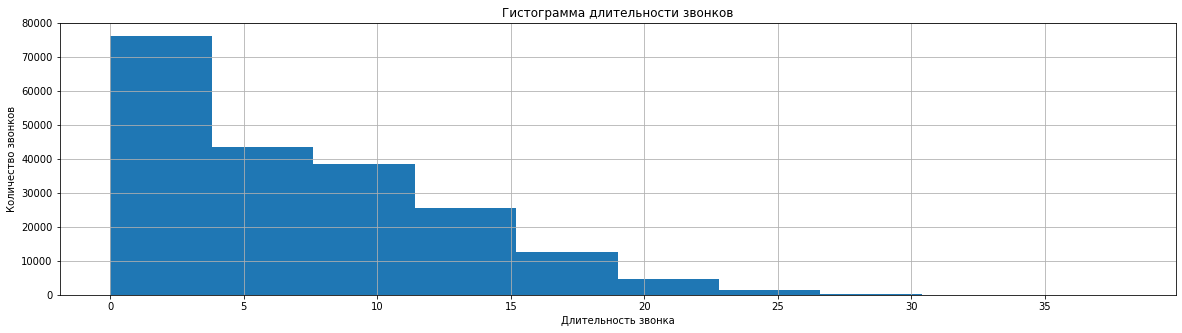

In [47]:
#создаем гистограмму
#creating histogramm
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(calls['duration'])

#добавляем сетку
#adding net
ax.grid(True)

#добавляем название графика
#adding chart name
ax.set_title('Гистограмма длительности звонков')

#добавляем названия осей
#adding axis titles 
ax.set_xlabel('Длительность звонка')
ax.set_ylabel('Количество звонков')

#отображаем график
#display chart
plt.show()

Более 75000 звонков совершается с продолжительностью не более 4 минут.
___
More than 75,000 calls are made with a duration of no more than 4 minutes.

In [48]:
#сохраним датафрейм о трафике интернета в переменную sessions
#save the internet traffic dataframe to the sessions variable
sessions = pd.read_csv('/datasets/internet.csv')

In [49]:
#первые 5 строк
#first 5 rows
sessions.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [50]:
#основная информация
#basic information
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Необходимо перевести 'session_date' в формат даты
___
Need to convert 'session_date' to date format

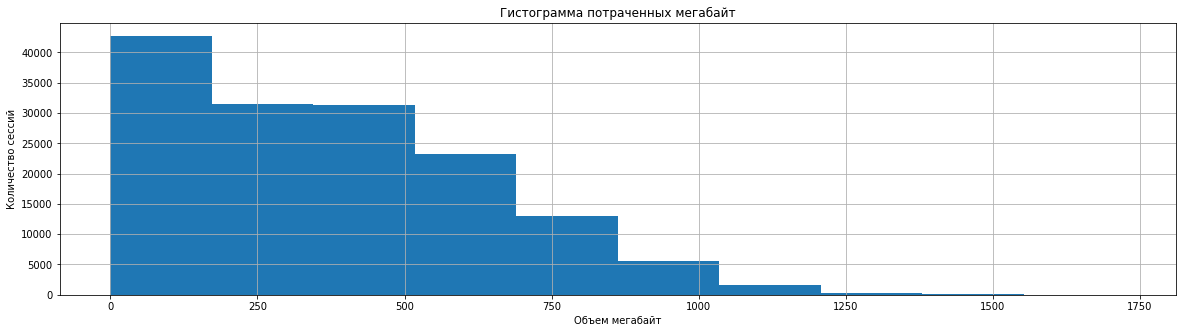

In [51]:
#создаем гистограмму
#creating histogramm
fig, ax = plt.subplots(figsize=(20,5))
ax.hist(sessions['mb_used'])

#добавляем сетку
#adding net
ax.grid(True)

#добавляем название графика
#adding chart name
ax.set_title('Гистограмма потраченных мегабайт')

#добавляем названия осей
#adding axis titles 
ax.set_xlabel('Объем мегабайт')
ax.set_ylabel('Количество сессий')

#отображаем график
#display chart
plt.show()

Наиболее востребован расход до 200 мегабайт и чуть больше 500 
___
The most demanded consumption is up to 200 megabytes and a little more than 500

In [52]:
#сохраним датафрейм о сообщкниях в переменную sessions
#save the messages dataframe to the messages variable
messages = pd.read_csv('/datasets/messages.csv')

In [53]:
#первые 5 строк
#first 5 rows
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [54]:
#основная информация
#basic information
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Необходимо перевести 'message_date' в формат даты
___
Need to convert 'message_date' to date format

In [55]:
#сохраним датафрейм о тарифах в переменную sessions
#save the tariffs dataframe to the tariffs variable
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [56]:
#выводим весь датафрейм tariffs
#output the entire tariffs dataframe
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Всего 2 тарифа
___
Only 2 tariffs

In [57]:
#основная информация
#basic information
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [58]:
#сохраним датафрейм о пользователях в переменную sessions
#save the users dataframe to the users variable
users = pd.read_csv('/datasets/users.csv')

In [59]:
#первые 5 строк
#first 5 rows
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [60]:
#основная информация
#basic information
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Необходимо перевести 'churn_date' и 'reg_date' в формат даты
___
Need to convert 'churn_date' and 'reg_date'to date format

___
# 2. Предобработка данных / Data preprocessing

Приведем столбцы:

- `call_date` из таблицы `calls`
- `session_date` из таблицы `sessions`
- `message_date` из таблицы `messages`
- `reg_date` из таблицы `users`
- `churn_date` из таблицы `users`

к новому типу с помощью метода `to_datetime()`
___
columns:

- `call_date` from table `calls`
- `session_date` from the `sessions` table
- `message_date` from the `messages` table
- `reg_date` from `users` table
- `churn_date` from `users` table

cast to a new type using the `to_datetime()` method.

In [61]:
#пропишем функцию, которая будет принимать на вход датафрейм и список названий столбцов, 
#которые нужно преобразовать в формат datetime
#let's write a function that will take a dataframe and a list of column names as input,
#to be converted to datetime format

def convert_columns(df, columns):
    for column in columns:
        df[column] = pd.to_datetime(df[column], format = '%Y%m%dT%H:%M:%S')
    return df

In [62]:
#передаем датафреймы и список столбцов, которые нужно преобразоват
#pass dataframes and a list of columns to be converted
calls = convert_columns(calls, ['call_date'])
sessions = convert_columns(sessions, ['session_date'])
messages = convert_columns(messages, ['message_date'])
users = convert_columns(users, ['reg_date', 'churn_date'])

In [63]:
#округление значений столбца duration с помощью np.ceil() и приведение типа к int
#round duration column values with np.ceil() and cast to int

calls['duration'] = np.ceil(calls['duration']).astype(int)

In [64]:
#удалим столбец Unnamed: 0 из датафрейма sessions 
#указание индекса (df.to_csv(..., index=column)) - не понадобится
#remove the Unnamed: 0 column from the sessions dataframe
#indicating the index (df.to_csv(..., index=column)) - not needed

sessions = sessions.drop(columns = 'Unnamed: 0')

In [65]:
#создадим столбец month в датафрейме calls с номером месяца из столбца call_date
#create a month column in the calls dataframe with the month number from the call_date column
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [66]:
#создадим столбец month в датафрейме messages с номером месяца из столбца message_date
#create a month column in the messages dataframe with the month number from the message_date column
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [67]:
#создадим столбец month в датафрейме sessions с номером месяца из столбца session_date
#create a month column in the sessions dataframe with the month number from the session_date column
sessions['month'] = pd.DatetimeIndex(sessions['session_date']).month
sessions

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,10
149392,1499_153,490.13,2018-12-14,1499,12
149393,1499_154,0.00,2018-10-27,1499,10
149394,1499_155,1246.32,2018-11-26,1499,11


In [68]:
#посчитаем количество звонков разговора для каждого пользователя по месяцам и сохраним в переменную calls_per_month
#calculate the number of calls in a conversation for each user by month and store it in the calls_per_month variable
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls = ('duration', 'count'))
calls_per_month

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
...              ...
1498    10        41
1499    9          9
        10        68
        11        74
        12        69

[3174 rows x 1 columns]

In [78]:
#считаем количество минут разговора для каждого пользователя по месяцам и сохраните в переменную minutes_per_month
#calculate the number of minutes of conversation for each user by month and save to the minutes_per_month variable
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes = ('duration', 'sum'))
minutes_per_month

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
...                ...
1498    10         247
1499    9           70
        10         449
        11         612
        12         492

[3174 rows x 1 columns]

In [70]:
#считаем количество отправленных сообщений по месяцам для каждого пользователя и сохраните в переменную messages_per_month
#calculate the number of messages for each user by month and save to the messages_per_month variable
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages = ('id', 'count'))
messages_per_month

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
...                 ...
1498    10           42
1499    9            11
        10           48
        11           59
        12           66

[2717 rows x 1 columns]

In [77]:
#считакм количество потраченных мегабайт по месяцам для каждого пользователя и сохраните в переменную sessions_per_month
#calculate the number of mb_used for each user by month and save to the messages_per_month variable
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used':'sum'})
sessions_per_month

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

___
# 3. Анализ данных и подсчёт выручки / Data analysis and revenue calculation

**Объединяем все посчитанные выше значения в один датафрейм user_behavior.**

Для каждой пары "пользователь - месяц" будут доступны информация о тарифе, количестве звонков, сообщений и потраченных мегабайтах
___
**Combine all the values ​​calculated above into one user_behavior dataframe.**

For each "user - month" pair, information about the tariff, the number of calls, messages and spent megabytes will be available

In [72]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [73]:
#определяем долю пользователей, рассторгнувших договор
#determine the proportion of users who terminated the contract
users_lost = users['churn_date'].count() / users['churn_date'].shape[0] * 100
print('Доля пользователей, рассторгнувших договор (%):', users_lost)

Доля пользователей, рассторгнувших договор (%): 7.6


In [81]:
#объединяем все посчитанные выше значения в один датафрейм user_behavior
#combine all the values calculated above into one user_behavior dataframe
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [82]:
#проверим пропуски в таблице user_behavior после объединения
#check for gaps in user_behavior table after join
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
first_name       0
last_name        0
reg_date         0
tariff           0
dtype: int64

In [83]:
print(user_behavior.columns)

Index(['user_id', 'month', 'calls', 'messages', 'mb_used', 'minutes', 'age',
       'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff'],
      dtype='object')


In [85]:
#заполним образовавшиеся пропуски нулями
#fill in the resulting gaps with zeros
user_behavior[['calls', 'minutes', 'messages', 'mb_used']] = user_behavior[['calls', 'minutes', 'messages', 'mb_used']].fillna(value=0)

In [87]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [89]:
#переименование столбца tariff_name на tariff
#rename column tariff_name to tariff
tariffs = tariffs.rename(columns={'tariff_name' : 'tariff'})

In [90]:
#объединяем user_behavior и tariffs
#combine user_behavior and tariffs
user_behavior = user_behavior.merge(tariffs, on='tariff')

In [91]:
user_behavior

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,42.0,20579.36,247.0,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,50,15360,500,550,200,3,3
3210,1499,9,9.0,11.0,1845.75,70.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3211,1499,10,68.0,48.0,17788.51,449.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3
3212,1499,11,74.0,59.0,17963.31,612.0,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,50,15360,500,550,200,3,3


In [92]:
#cчитаем количество минут разговора, превышающих включенные в тариф
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']

#cчитаем количество сообщений, превышающих включенные в тариф
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']

#cчитаем количество мегабайт, превышающих включенные в тариф
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

In [94]:
#выбираем все строки, в которых значение столбца меньше 0, и затем заменяет эти значения на 0
#select all rows where the column value is less than 0 and then replace those values with 0

for col in ['paid_minutes', 'paid_messages', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

In [95]:
#переводим превышающие тариф мегабайты в гигабайты и сохраняем в столбец paid_gb
#convert the excess megabytes to gigabytes and save it in the paid_gb column
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

In [96]:
#cчитаем выручку за минуты разговора
rev_minutes = user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
print('Выручка за минуты разговора:',rev_minutes)
#cчитаем выручку за сообщения
rev_messages = user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
print('Выручка за сообщения:',rev_messages)
#cчитаем выручку за интернет
rev_gb = user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']
print('Выручка за интернет:',rev_gb)

Выручка за минуты разговора: 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
3209      0.0
3210      0.0
3211      0.0
3212    336.0
3213      0.0
Length: 3214, dtype: float64
Выручка за сообщения: 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
3209     0.0
3210     0.0
3211     0.0
3212    27.0
3213    48.0
Length: 3214, dtype: float64
Выручка за интернет: 0          0
1          0
2          0
3          0
4          0
        ... 
3209    1200
3210       0
3211     600
3212     600
3213       0
Length: 3214, dtype: int64


In [97]:
#cчитаем помесячную выручку с каждого пользователя в столбец total_cost
#calculate the monthly revenue from each user in the total_cost column
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

In [98]:
user_behavior

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,first_name,...,rub_per_message,rub_per_minute,paid_minutes,paid_messages,paid_mb,paid_gb,cost_minutes,cost_messages,cost_gb,total_cost
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Краснодар,Рафаил,...,1,1,0.0,0.0,0.00,0,0.0,0.0,0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,10,41.0,42.0,20579.36,247.0,68,2018-10-25,Владикавказ,Всеволод,...,3,3,0.0,0.0,5219.36,6,0.0,0.0,1200,1750.0
3210,1499,9,9.0,11.0,1845.75,70.0,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,0.00,0,0.0,0.0,0,550.0
3211,1499,10,68.0,48.0,17788.51,449.0,35,NaT,Пермь,Гектор,...,3,3,0.0,0.0,2428.51,3,0.0,0.0,600,1150.0
3212,1499,11,74.0,59.0,17963.31,612.0,35,NaT,Пермь,Гектор,...,3,3,112.0,9.0,2603.31,3,336.0,27.0,600,1513.0


Датафрейм stats_df для каждой пары "месяц-тариф" будет хранить основные характеристики
___
The stats_df dataframe for each "month-tariff" pair will store the main characteristics

In [99]:
# сохранение статистических метрик для каждой пары месяц-тариф
# в одной таблице stats_df (среднее значение, стандартное отклонение, медиана)

# saving statistical metrics for each month-tariff pair
# in one table stats_df (mean, standard deviation, median)

stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],\
            values=['calls', 'minutes', 'messages', 'mb_used'],\
            aggfunc=['mean', 'std', 'median']\
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


**Распределение среднего количества звонков по видам тарифов и месяцам**
___
Distribution of the average number of calls by types of tariffs and months

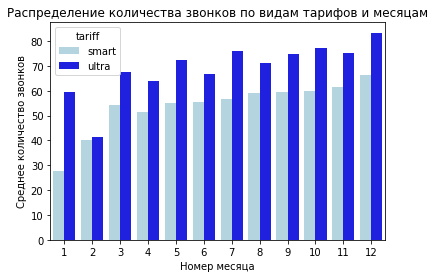

In [103]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
ax.set_title('Распределение количества звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество звонков');

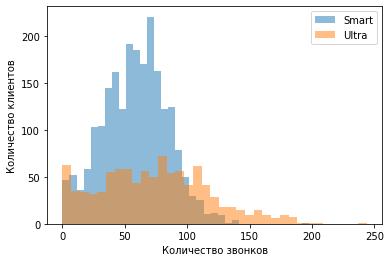

In [104]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Количество звонков')
plt.ylabel('Количество клиентов')
plt.show()

**Распределение средней продолжительности звонков по видам тарифов и месяцам**
___
Distribution of average duration of calls by types of tariffs and months

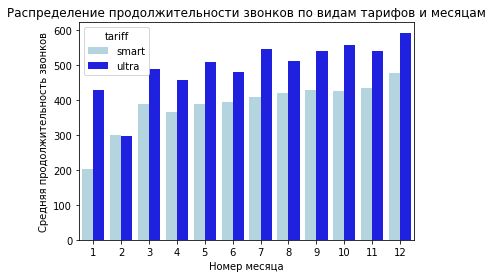

In [105]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])
ax.set_title('Распределение продолжительности звонков по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Средняя продолжительность звонков');

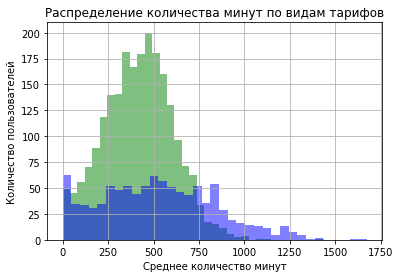

In [106]:
fig, ax = plt.subplots()
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue')
ax.set_title('Распределение количества минут по видам тарифов')
ax.set(xlabel='Среднее количество минут', ylabel='Количество пользователей');

Средняя длительность разговоров у абонентов тарифа Ultra больше, чем у абонентов тарифа Smart. В течение года пользователи обоих тарифов увеличивают среднюю продолжительность своих разговоров. Рост средней длительности разговоров у абонентов тарифа Smart равномерный в течение года. Пользователи тарифа Ultra не проявляют подобной линейной стабильности. Стоит отметить, что феврале у абонентов обоих тарифных планов наблюдались самые низкие показатели.
___
The average duration of calls for Ultra tariff subscribers is longer than for Smart tariff subscribers. During the year, users of both tariffs increase the average duration of their calls. The growth of the average duration of calls for subscribers of the Smart tariff is uniform throughout the year. Users of the Ultra tariff do not show such linear stability. It should be noted that in February subscribers of both tariff plans had the lowest rates.

**Распределение среднего количества сообщений по видам тарифов и месяцам**
___
Distribution of the average number of messages by types of tariffs and months

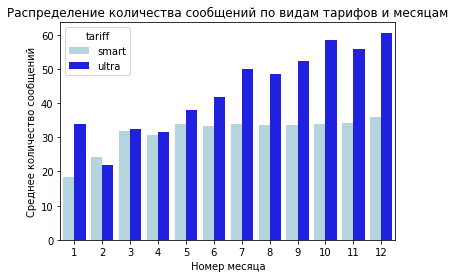

In [107]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)
ax.set_title('Распределение количества сообщений по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество сообщений');

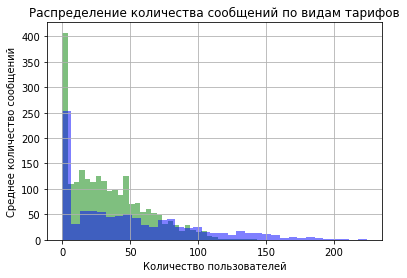

In [108]:
fig, ax = plt.subplots()
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue')
ax.set_title('Распределение количества сообщений по видам тарифов')
ax.set(xlabel='Количество пользователей', ylabel='Среднее количество сообщений');

В среднем количество сообщений пользователи тарифа Ultra отправляют больше - почти на 20 сообщений больше, чем пользователи тарифа Smart. Количество сообщений в течение года на обоих тарифак растет. Динамика по отправке сообщений схожа с тенденциями по длительности разговоров: в феврале отмечено наименьшее количество сообщений за год и пользователи тарифа Ultra также проявляют нелинейную полодительную динамику.
___
On average, Ultra tariff users send more messages - almost 20 messages more than Smart tariff users. The number of messages during the year on both tariffs is growing. The dynamics of sending messages is similar to the trends in terms of the duration of calls: in February, the smallest number of messages per year was noted, and users of the Ultra tariff also show non-linear positive dynamics.

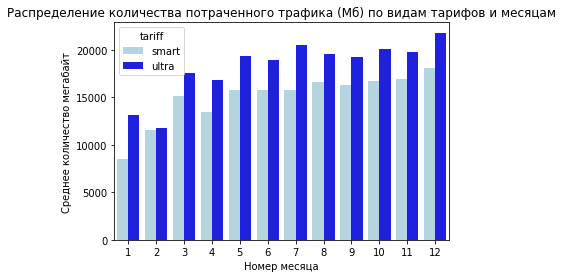

In [109]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Распределение количества потраченного трафика (Мб) по видам тарифов и месяцам')
ax.set(xlabel='Номер месяца', ylabel='Среднее количество мегабайт');

Меньше всего пользователи использовали интернет в январе, феврале и апреле.
___
Users used the Internet the least in January, February and April.

**Сравнение потраченных мегабайт среди пользователей тарифов Smart и Ultra**
___
Comparison of megabytes spent among users of Smart and Ultra tariffs

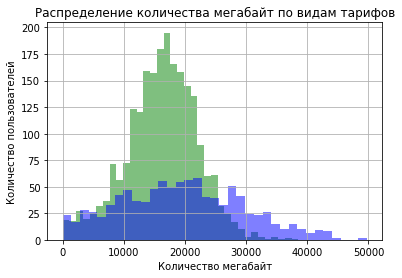

In [110]:
fig, ax = plt.subplots()
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue')
ax.set_title('Распределение количества мегабайт по видам тарифов')
ax.set(xlabel='Количество мегабайт', ylabel='Количество пользователей');

Чаще всего абоненты тарифа Smart тратят 15-17 Гб, а абоненты тарифного плана Ultra - 19-21 ГБ.
___
Most often, subscribers of the Smart tariff plan spend 15-17 GB, and subscribers of the Ultra tariff plan - 19-21 GB.

___
# 4. Проверка гипотез¶ / Hypothesis testing¶

**Проверка гипотезы 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются**

```
H_0: Выручка (total_cost) пользователей "Ультра" = выручка (total_cost) пользователей "Смарт"`
H_a: Выручка (total_cost) пользователей "Ультра" ≠ выручка (total_cost) пользователей "Смарт"`
alpha = 0.05
```
___
Hypothesis test 1: the average revenue of users of the Ultra and Smart tariffs are different;

```
H_0: Revenue (total_cost) of "Ultra" users = revenue (total_cost) of "Smart" users`
H_a: Revenue (total_cost) of "Ultra" users ≠ revenue (total_cost) of "Smart" users`
alpha = 0.05
```

In [115]:
results = st.ttest_ind(user_behavior[user_behavior['tariff'] =='ultra']['total_cost'], user_behavior[user_behavior['tariff'] == 'smart']['total_cost'], equal_var=False) #вызов метода для проверки гипотезы

#уровень значимости
#significance level
alpha = .05

#вывод значения p-value на экран 
#output the p-value on the screen
print(results.pvalue)

#условный оператор с выводом строки с ответом
#conditional statement with the output of a string with the answer
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.2606313931076085e-250
Отвергаем нулевую гипотезу


**Проверка гипотезы 2: пользователи из Москвы приносят больше выручки, чем пользователи из других городов**

```
H_0: Выручка (total_cost) пользователей из Москвы = выручка (total_cost) пользователей не из Москвы`
H_1: Выручка (total_cost) пользователей из Москвы ≠ выручка (total_cost) пользователей не из Москвы`
alpha = 0.05
```
___
Hypothesis test 2: users from Moscow bring in more revenue than users from other cities;

```
H_0: Revenue (total_cost) of users from Moscow = revenue (total_cost) of users not from Moscow`
H_1: Revenue (total_cost) of users from Moscow ≠ revenue (total_cost) of users not from Moscow`
alpha = 0.05
```

In [116]:
results = st.ttest_ind(user_behavior[user_behavior['city'] == 'Москва']['total_cost'], user_behavior[user_behavior['city'] != 'Москва']['total_cost'], equal_var=False)# вызов метода для проверки гипотезы

#уровень значимости
#significance level
alpha = .05 

#вывод значения p-value на экран 
#output the p-value on the screen
print(results.pvalue)

#условный оператор с выводом строки с ответом
#conditional statement with the output of a string with the answer
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
                       

0.5257376663729298
Не получилось отвергнуть нулевую гипотезу
